## import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score, roc_curve
import warnings
warnings.filterwarnings("ignore")



## Data Gatharing 

In [44]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [45]:
data= df


In [46]:
data.shape

(891, 12)

In [47]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## EDA

In [50]:
data["Survived"].value_counts()

0    547
1    344
Name: Survived, dtype: int64

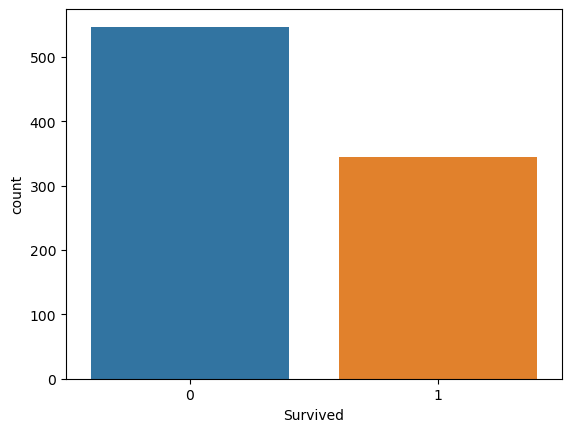

In [51]:
sns.countplot(x="Survived" , data=data)
plt.show()

In [52]:
data["Gender"].value_counts()


male      577
female    314
Name: Gender, dtype: int64

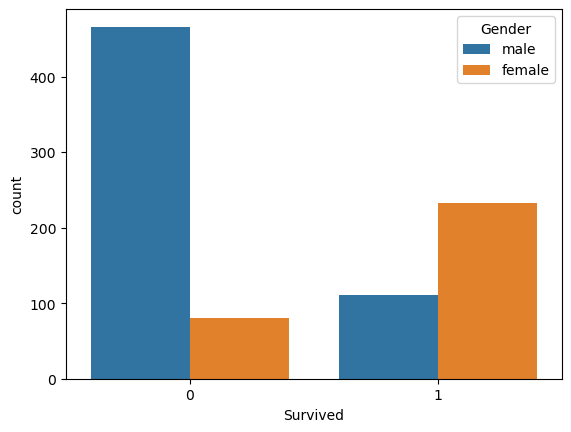

In [53]:
sns.countplot(x="Survived" ,hue = "Gender" , data=data)
plt.show()

In [54]:
data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

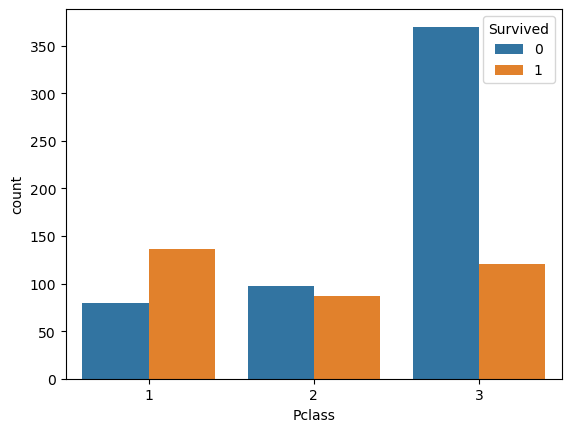

In [55]:
sns.countplot(x="Pclass" , hue = "Survived" , data=data)
plt.show()

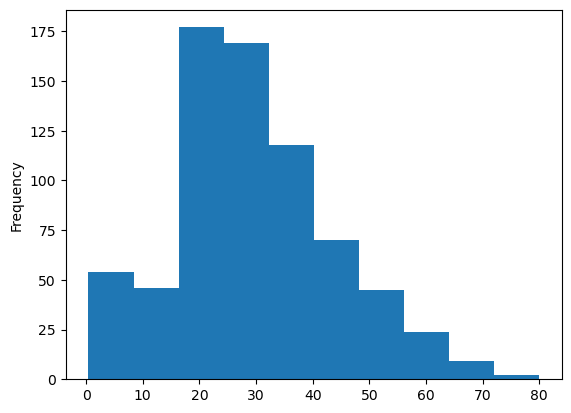

In [56]:
data["Age"].plot.hist()
plt.show()

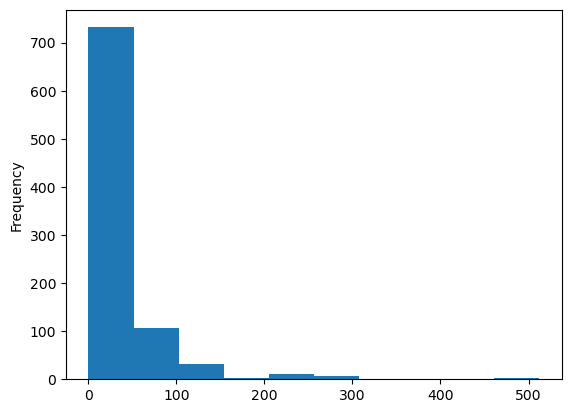

In [58]:
data["Fare"].plot.hist()
plt.show()

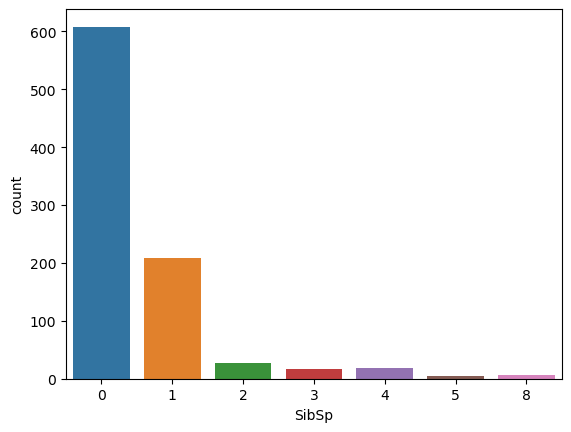

In [59]:
sns.countplot(x= "SibSp" , data=data , )
plt.show()

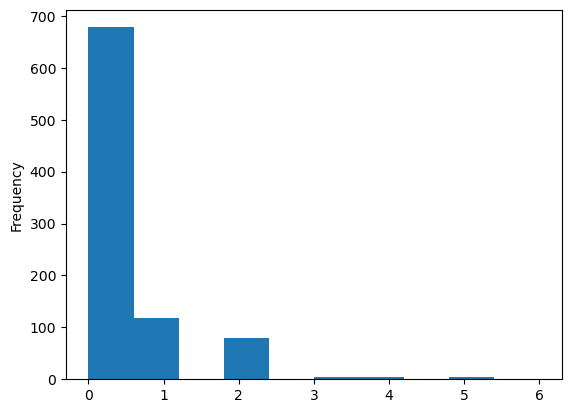

In [60]:

data["Parch"].plot.hist()
plt.show()

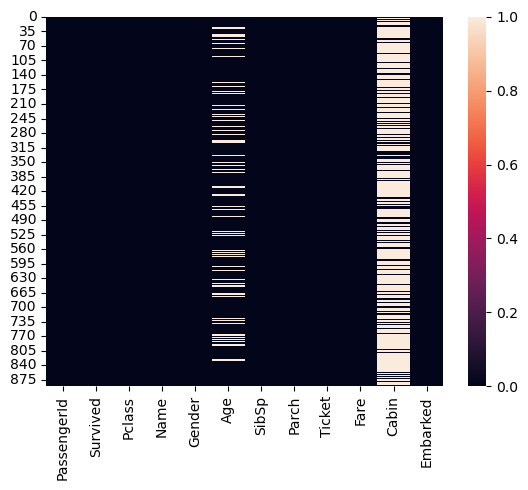

In [61]:
sns.heatmap(data.isnull())
plt.show()

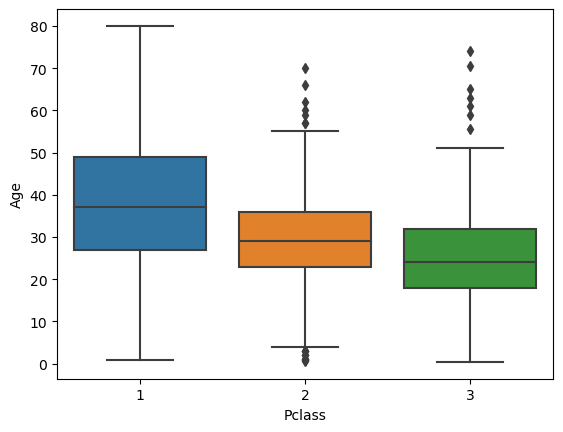

In [62]:
sns.boxplot(x= "Pclass", y = "Age" , data=data)
plt.show()

In [63]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [65]:
data = data.drop(columns= "Cabin" , axis =1 )

In [66]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
print(data['Embarked'].mode())
print(data['Embarked'].mode()[0])
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

0    S
Name: Embarked, dtype: object
S


In [67]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [69]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
data.replace({'Gender':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [82]:
x=data.drop(columns=['PassengerId','Name','Survived','Ticket'],axis=1)
y=data['Survived']

In [83]:
print(x)


     Pclass  Gender        Age  SibSp  Parch     Fare  Embarked
0         3       0  22.000000      1      0   7.2500         0
1         1       1  38.000000      1      0  71.2833         1
2         3       1  26.000000      0      0   7.9250         0
3         1       1  35.000000      1      0  53.1000         0
4         3       0  35.000000      0      0   8.0500         0
..      ...     ...        ...    ...    ...      ...       ...
886       2       0  27.000000      0      0  13.0000         0
887       1       1  19.000000      0      0  30.0000         0
888       3       1  29.699118      1      2  23.4500         0
889       1       0  26.000000      0      0  30.0000         1
890       3       0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [84]:
print(y)


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## train data

In [85]:
x=data.drop(columns=['PassengerId','Name','Survived','Ticket'],axis=1)
y=data['Survived']

In [86]:
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=4)

In [87]:
x_test

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
646,3,0,19.000000,0,0,7.8958,0
876,3,0,20.000000,0,0,9.8458,0
359,3,1,29.699118,0,0,7.8792,2
194,1,1,44.000000,0,0,27.7208,1
819,3,0,10.000000,3,2,27.9000,0
...,...,...,...,...,...,...,...
568,3,0,29.699118,0,0,7.2292,1
254,3,1,41.000000,0,2,20.2125,0
406,3,0,51.000000,0,0,7.7500,0
710,1,1,24.000000,0,0,49.5042,1


## Logistic Regression 

In [88]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [91]:
y_pred = logistic_reg.predict(x_test)
len(y_pred)

179

In [93]:
y_pred[0:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [94]:
y_test[0:5]

646    0
876    0
359    1
194    1
819    0
Name: Survived, dtype: int64

In [109]:
y_pred= logistic_reg.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :- \n" , cnf_matrix)

print("*"*60)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy)

print("*"*60)

clf_report = classification_report(y_test, y_pred)
print("classification Report :- \n", clf_report)

Confusion Matrix :- 
 [[107  12]
 [ 21  39]]
************************************************************
Accuracy :  0.8156424581005587
************************************************************
classification Report :- 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       119
           1       0.76      0.65      0.70        60

    accuracy                           0.82       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.81      0.82      0.81       179



In [111]:
y_pred_train = logistic_reg.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :- \n", cnf_matrix)

print("*"*60)
accuracy = accuracy_score (y_train , y_pred_train)
print("Accuracy :", accuracy )
print("*"*60)
clf_report = classification_report(y_train , y_pred_train)
print("Classification Report :- \n", clf_report)

Confusion Matrix :- 
 [[362  66]
 [ 83 201]]
************************************************************
Accuracy : 0.7907303370786517
************************************************************
Classification Report :- 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       428
           1       0.75      0.71      0.73       284

    accuracy                           0.79       712
   macro avg       0.78      0.78      0.78       712
weighted avg       0.79      0.79      0.79       712

